**1 - Explore these Topics**

Gradient Descent & Types of Gradient Descent

### Gradient Descent

**Description**: Gradient Descent is an optimization algorithm used to minimize the loss function of a model by iteratively adjusting its parameters in the direction of the negative gradient.


### Types of Gradient Descent

Gradient Descent can be tailored in various ways to improve performance or to address specific issues. The main variants include:

### 1. Batch Gradient Descent

**Description**: Uses the entire dataset to compute the gradient of the loss function and update the parameters in each iteration.

**Pros**:
- **Stable Convergence**: Provides smooth and stable updates due to the use of the full dataset.
- **Deterministic**: The updates are consistent across iterations, given the same dataset.

**Cons**:
- **Computationally Expensive**: Requires significant memory and computational resources, especially for large datasets.
- **Slow for Large Datasets**: Processing the entire dataset at once can be time-consuming.

### 2. Stochastic Gradient Descent (SGD)

**Description**: Uses a single data point (or a very small subset) to compute the gradient and update the parameters in each iteration.

**Pros**:
- **Fast Updates**: Updates are performed more frequently, which can lead to faster convergence.
- **Less Memory Usage**: Requires less memory compared to batch gradient descent as it processes one example at a time.
- **Can Escape Local Minima**: The noisiness of updates can help the algorithm escape local minima.

**Cons**:
- **Noisy Updates**: The frequent, noisy updates can lead to high variance in the loss function.
- **Convergence Issues**: Can be more challenging to converge to the exact minimum due to the stochastic nature.

### 3. Mini-Batch Gradient Descent

**Description**: Uses a small, random subset of the dataset (mini-batch) to compute gradients and update parameters. This is a compromise between batch and stochastic gradient descent.

**Pros**:
- **Balance**: Provides a good balance between the stability of batch gradient descent and the speed of SGD.
- **Efficient Computation**: Can take advantage of vectorized operations and parallel processing.
- **Reduced Variance**: The noise in updates is reduced compared to SGD.

**Cons**:
- **Mini-Batch Size Selection**: The performance can be sensitive to the choice of mini-batch size.
- **Still Noisy**: Although less noisy than SGD, there can still be some variance in the updates.

### 4. Momentum-Based Gradient Descent

**Description**: Incorporates a momentum term to accelerate gradient descent and smooth out the updates. The update is influenced by the previous updates.

**Pros**:
- **Faster Convergence**: Helps accelerate convergence, especially in the direction of consistent gradients.
- **Smoothing Effect**: Reduces oscillations and noise in the gradient updates.

**Cons**:
- **Additional Hyperparameter**: Requires tuning of the momentum parameter.
- **Can Overshoot**: If momentum is too high, it may cause the updates to overshoot the minimum.

### 5. Adaptive Gradient Methods

**Description**: Includes algorithms that adjust the learning rate based on the history of gradients. Examples include AdaGrad, RMSprop, and Adam.

#### AdaGrad

- **Pros**: Adapts learning rates based on the frequency of updates; works well for sparse data.
- **Cons**: Learning rates can become too small, leading to slow convergence in the later stages of training.

#### RMSprop

- **Pros**: Addresses AdaGrad's issue of rapidly decreasing learning rates; suitable for non-stationary problems.
- **Cons**: Requires careful tuning of parameters like decay rates.

#### Adam (Adaptive Moment Estimation)

- **Pros**: Combines the advantages of both Momentum and RMSprop; provides adaptive learning rates and can handle noisy gradients well.
- **Cons**: More complex and requires tuning of additional parameters.



## Validation Set & Validation Loss

### Validation Set

**Description**: A subset of the dataset used to evaluate the model's performance during training. It helps in tuning hyperparameters and preventing overfitting by providing an unbiased evaluation metric.
Provides an indication of how well the model is generalizing to unseen data.
Helps in selecting the best hyperparameters.


### Validation Loss

**Description**: The loss calculated on the validation set. It measures how well the model's predictions match the true values on the validation data.
Provides a quantitative measure of the model's performance on unseen data.
Helps in identifying when a model starts overfitting to the training data.



**2 - Create a MLP model step by step as we discussed in class and load tips data from Seaborn Library.**

In [ ]:
# import
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
# Load tips dataset
tips = sns.load_dataset('tips')

# Display  rows
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# Convert categorical variables to one-hot encoded format(categorical data as binary vectors)
tips = pd.get_dummies(tips, drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [ ]:

# Selecting features and target (predicting 'tip' on the basis of features)
# input features - except tip
x = tips.drop("tip", axis=1)
# output variable   - tip
y = tips["tip"]

In [ ]:
# Display x
x.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,True,True,False,False,True,True
1,10.34,3,False,True,False,False,True,True
2,21.01,3,False,True,False,False,True,True
3,23.68,2,False,True,False,False,True,True
4,24.59,4,True,True,False,False,True,True


In [ ]:
# display y
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [ ]:
# Splitting dataset 80:20
#standard : 60:90 trainig - 10:40 test
#test_size : 0.2 (20% data use for testing, 80% remaining for training)
#random_state: use to shuffle data before splitting into test/train set (rows in single epoch)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing features
# units(neuron): 64 -  never be less than given features(input_shape(x_train.shape[1])), minimum = same
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# Create a Sequential model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation="relu"), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer by default activation='linear'
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
model.compile(optimizer="adam", loss="mean_squared_error", metrics =['mae']) # mae :mean absolute error



In [ ]:
# Training model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# epoch: iteration
# batch_size :how many rows in 1 epoch



Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 14.9851 - mae: 3.4331 - val_loss: 8.7597 - val_mae: 2.6283
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9368 - mae: 2.9295 - val_loss: 7.2230 - val_mae: 2.3225
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7726 - mae: 2.6794 - val_loss: 5.9247 - val_mae: 2.0289
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.0024 - mae: 2.3654 - val_loss: 4.8411 - val_mae: 1.7682
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3482 - mae: 2.0286 - val_loss: 3.9503 - val_mae: 1.5347
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3739 - mae: 1.6274 - val_loss: 3.2258 - val_mae: 1.3368
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2434 - mae: 1.4896 - val_loss: 2.6581 - val_mae: 1.1782
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9833 - mae: 1.2874 - val_loss: 2.2616 - val_mae: 1.0831
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7209 - mae

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [ ]:
# Evaluating model using mean_squared_error
loss, accuracy = model.evaluate(x_test, y_test)

print('Mean Squared Error: ', loss)
print('Test Accuracy: ', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3305 - mae: 0.8795 
Mean Squared Error:  1.2159196138381958
Test Accuracy:  0.8459014892578125


In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict.get('val_loss', [])

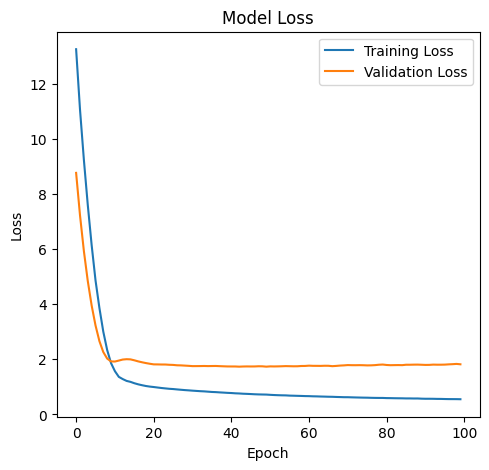

In [ ]:
# Plot  Training and Validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
